# Computer Vision - Lab 3 - Gabriel Hurtado

## 1 - 1

In [1]:
import cv2
import numpy as np
import sys
import math
import random
from matplotlib import pyplot as plt

In [2]:
def findM(UVs,XYZs,verbose=False):
    n=len(UVs)
    As=np.zeros((2*n,12))
    for i in range(0,n):
        for j in range(0,2):
            curr2d=-XYZs[i,:]*UVs[i,:][j]#is it right ?
            if(j==1):
                rangeJ=slice(4,8)
            else:
                rangeJ=slice(0,4)
            As[2*i+j,rangeJ]=XYZs[i,:]
            As[2*i+j,slice(8,12)]=curr2d
            if(verbose):
                print("step "+str(2*i+j))
                print("XYZ= ")
                print(XYZs[i,:])
                print("UV")
                print(UVs[i,:][j])
                print(curr2d)            
                print("As=")
                print(As[2*i+j,:])
   
    doted=np.dot(As.T,As)
    _, _,vectors = np.linalg.svd(doted)
    m=vectors[-1]
    m=m.reshape(3,4)
    return m

In [3]:
UVs=np.loadtxt('pts2d-norm-pic_a.txt')
XYZs=np.loadtxt('pts3d-norm.txt')
ones=np.ones(len(XYZs))
ones=ones[:,None]
XYZsNm=np.concatenate((XYZs,ones),axis=1)

In [4]:
m=findM(UVs,XYZsNm)
print("m = \n"+str(m))

m = 
[[ 0.45827554 -0.29474237 -0.01395746  0.0040258 ]
 [-0.05085589 -0.0545847  -0.54105993 -0.05237592]
 [ 0.10900958  0.17834548 -0.04426782  0.5968205 ]]


In [5]:
def project(m,XYZsNm,UVs):#retrurns the projection and residual     
    UVsHom=np.dot(m,XYZsNm.T)
    UVsComp=np.zeros((len(UVs),2))
    for i in range(len(UVs)):
        for j in range(0,2):
            UVsComp[i,j]=UVsHom[j,i]/UVsHom[2,i]

    dist = np.linalg.norm(UVs-UVsComp)
    return UVsComp,dist

UVsComp,dist=project(m,XYZsNm,UVs)
print("Last coordianet computed "+str(UVsComp[-1]))
print("Distance between computed and true = "+str(dist))       

Last coordianet computed [ 0.14190608 -0.45184301]
Distance between computed and true = 0.0129913733751


## 1 - 2

In [6]:
UVs=np.loadtxt('pts2d-pic_b.txt')
XYZs=np.loadtxt('pts3d.txt')
n=len(XYZs)
ones=np.ones(n)
ones=ones[:,None]
XYZsNm=np.concatenate((XYZs,ones),axis=1)

distMin=math.inf
ks=[8,12,16]
for k in ks:
    for i in range(0,10):
        selected=random.sample(range(0,n),k)
        UVsK=UVs[selected]
        XYZsNmK=XYZsNm[selected]
        m=findM(UVsK,XYZsNmK)
        while True:
            others=random.sample(range(0,n),4)
            if(not(any(x in selected for x in others))):
                break
        UVsCompK,distK=project(m,XYZsNmK,UVsK)
        if(distK<distMin):
            distMin=distK
            bestM=m
        print("Residual at try "+str(i)+" for k = "+str(k)+" is "+str(distK))

print("Best m found with residual of "+str(distMin)+" is \n"+str(bestM))

Residual at try 0 for k = 8 is 0.505006219354
Residual at try 1 for k = 8 is 1.40613393089
Residual at try 2 for k = 8 is 0.929824540108
Residual at try 3 for k = 8 is 0.955407892129
Residual at try 4 for k = 8 is 1.05466294091
Residual at try 5 for k = 8 is 1.11616987002
Residual at try 6 for k = 8 is 1.96680275087
Residual at try 7 for k = 8 is 1.37379691589
Residual at try 8 for k = 8 is 1.44205221162
Residual at try 9 for k = 8 is 1.26920125138
Residual at try 0 for k = 12 is 2.75865441993
Residual at try 1 for k = 12 is 2.28290450184
Residual at try 2 for k = 12 is 2.51117979897
Residual at try 3 for k = 12 is 2.64662722483
Residual at try 4 for k = 12 is 2.92322507436
Residual at try 5 for k = 12 is 2.99494568179
Residual at try 6 for k = 12 is 2.87898140768
Residual at try 7 for k = 12 is 2.51465245545
Residual at try 8 for k = 12 is 2.50339926208
Residual at try 9 for k = 12 is 2.44266131232
Residual at try 0 for k = 16 is 3.28713368576
Residual at try 1 for k = 16 is 2.9133221

We notice that the residual seem to be smaller when choosing randomly points in the set, and picking the best m for different random selections. Computing m with a bigger set increases the probability of fitting noise.

## 1 - 3

In [7]:
def findC(bestM):
    Q=bestM[:,0:3]
    m4=bestM[:,3]
    Qinv=np.linalg.inv(Q)
    C=np.dot(-Qinv,m4.T)
    return C
C=findC(m)
print("Debug output = "+str(C))
C=findC(bestM)
print("Output for previous best m = "+str(C))

Debug output = [ 303.0867893   307.18622908   30.42279071]
Output for previous best m = [ 303.16198219  307.25898482   30.4208521 ]


# 2

## 2 - 1

In [8]:
UVsA=np.loadtxt('pts2d-pic_a.txt')
UVsB=np.loadtxt('pts2d-pic_b.txt')
ones=np.ones(len(UVsA))
ones=ones[:,None]
UVsA=np.concatenate((UVsA,ones),axis=1)
UVsB=np.concatenate((UVsB,ones),axis=1)


In [9]:
def findF(UVsA,UVsB,verbose=False):
    n=len(UVs)
    As=np.zeros((n,9))
    for i in range(0,n):
        currA=UVsA[i,:]
        currB=UVsB[i,:]
        for j in range(0,3):
            rangeCurr=slice(0+j*3,3+j*3)
            As[i,rangeCurr]=currB*currA[j]
        if(verbose):
            print("UV A")
            print(currA)
            print("UV B")
            print(currB)
            print("Line")
            print(As[i,:])
    doted=np.dot(As.T,As)
    _, _,vectors = np.linalg.svd(doted)
    m=vectors[-1]
    m=m.reshape(3,3)
    if(verbose):
        print(As)
    return m

In [10]:
f_=findF(UVsA,UVsB)
print("f_ = \n"+str(f_))

f_ = 
[[ -6.60698417e-07   8.82396296e-06  -9.07382302e-04]
 [  7.91031621e-06   1.21382933e-06  -2.64234650e-02]
 [ -1.88600198e-03   1.72332901e-02   9.99500092e-01]]


## 2 - 2

In [11]:
def reduceRank(f_):
    u, e, vt = np.linalg.svd(f_)
    e[-1]=0
    f=np.dot(np.dot(u,np.diag(e)), vt)
    return f
f=reduceRank(f_)
print("f = \n"+str(f))

f = 
[[ -5.36264198e-07   8.83539184e-06  -9.07382264e-04]
 [  7.90364771e-06   1.21321685e-06  -2.64234650e-02]
 [ -1.88600204e-03   1.72332901e-02   9.99500092e-01]]


## 2 - 3 

In [12]:
lineB=np.dot(UVsA,f)
lineA=np.dot(UVsB,f.T)

In [13]:
def drawlines(img,lines,pts1,pts2):
    r,c,_ = img.shape
    for r in lines:
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img = cv2.line(img, (x0,y0), (x1,y1),1)
    return img

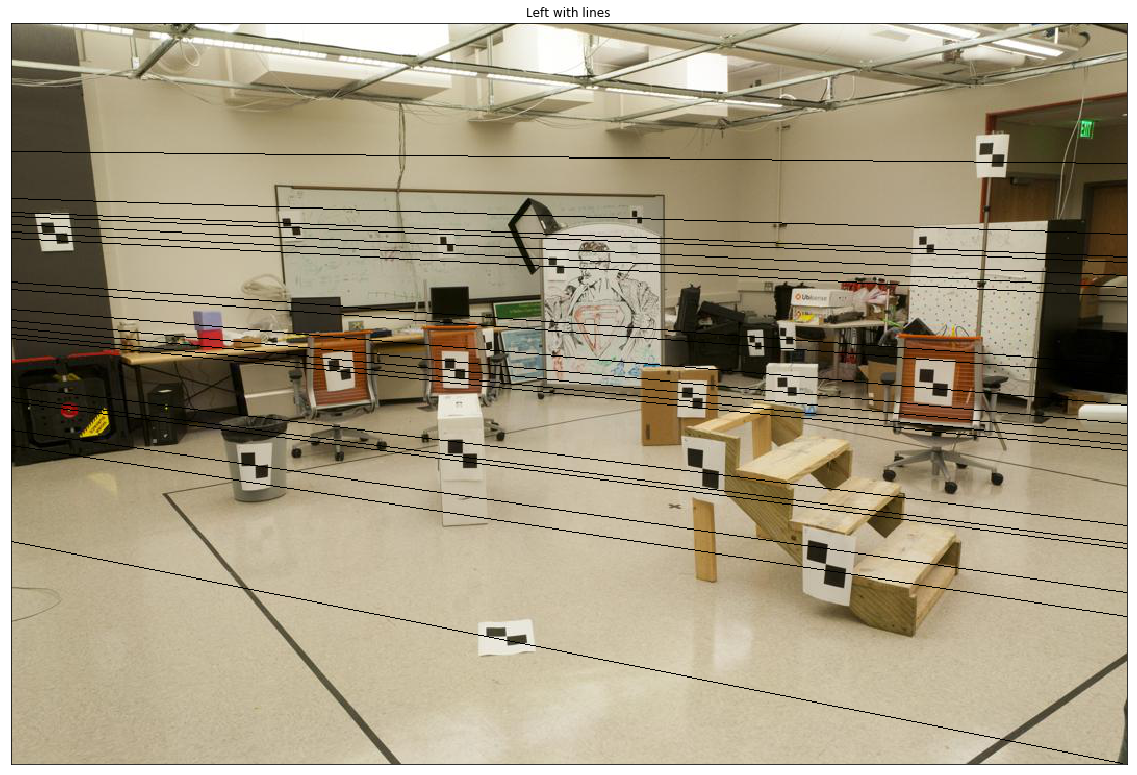

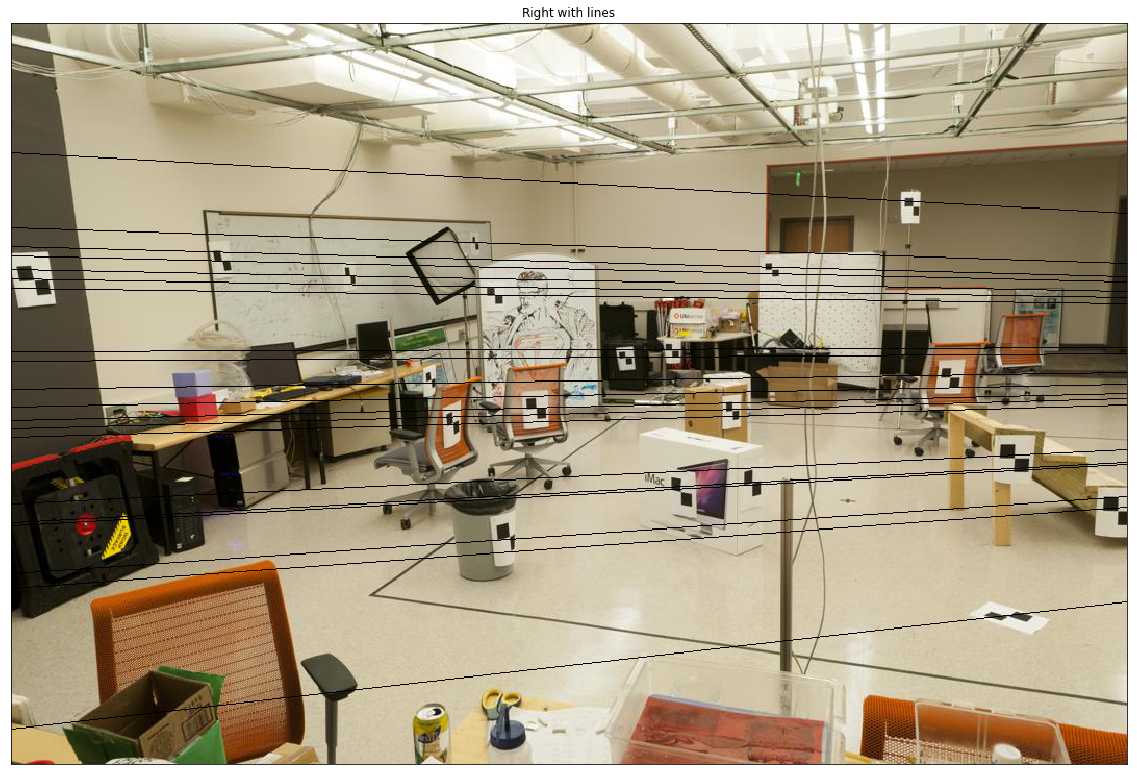

In [14]:
imgA = cv2.imread('pic_a.jpg')  
imgB = cv2.imread('pic_b.jpg') 

imgBLines = drawlines(imgB,lineB,UVsB,UVsA)
imgALines = drawlines(imgA,lineA,UVsA,UVsB)

b,g,r = cv2.split(imgALines)       # get b,g,r
imgALines = cv2.merge([r,g,b])     # switch it to rgb
plt.figure(figsize=(20,30))
plt.imshow(imgALines)
plt.title('Left with lines'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(imgBLines)       # get b,g,r
imgBLines = cv2.merge([r,g,b])     # switch it to rgb
plt.figure(figsize=(20,30))
plt.imshow(imgBLines)
plt.title('Right with lines'), plt.xticks([]), plt.yticks([])
plt.show()

## 2 - 4

In [15]:
UVsA=np.loadtxt('pts2d-pic_a.txt')
UVsB=np.loadtxt('pts2d-pic_b.txt')
ones=np.ones(len(UVsA))
ones=ones[:,None]
UVsA=np.concatenate((UVsA,ones),axis=1)
UVsB=np.concatenate((UVsB,ones),axis=1)

In [16]:
UVsA[:,0].mean()

558.95000000000005

In [17]:
def findT(UVs):
    UVsCop=UVs.copy()
    S=np.eye(3)
    C=np.eye(3)
    Cu=UVs[:,0].mean()
    Cv=UVs[:,1].mean()
    C[0,2]-=Cu
    C[1,2]-=Cv
    UVsCop[:,0]-=Cu
    UVsCop[:,1]-=Cv
    sval=1/max(UVsCop.min(), UVsCop.max(), key=abs)    
    S[0,0]=sval
    S[1,1]=sval
    print(C)
    print(S)
    return np.dot(S,C)

In [18]:
Ta=findT(UVsA)
Tb=findT(UVsB)
print("Ta=\n"+str(Ta))
print("Tb=\n"+str(Tb))

[[   1.      0.   -558.95]
 [   0.      1.   -325.6 ]
 [   0.      0.      1.  ]]
[[-0.00193817  0.          0.        ]
 [ 0.         -0.00193817  0.        ]
 [ 0.          0.          1.        ]]
[[   1.     0.  -616.7]
 [   0.     1.  -346.9]
 [   0.     0.     1. ]]
[[-0.00168152  0.          0.        ]
 [ 0.         -0.00168152  0.        ]
 [ 0.          0.          1.        ]]
Ta=
[[-0.00193817  0.          1.08334141]
 [ 0.         -0.00193817  0.6310689 ]
 [ 0.          0.          1.        ]]
Tb=
[[-0.00168152  0.          1.03699344]
 [ 0.         -0.00168152  0.58331932]
 [ 0.          0.          1.        ]]


In [19]:
UVsA

array([[ 880.,  214.,    1.],
       [  43.,  203.,    1.],
       [ 270.,  197.,    1.],
       [ 886.,  347.,    1.],
       [ 745.,  302.,    1.],
       [ 943.,  128.,    1.],
       [ 476.,  590.,    1.],
       [ 419.,  214.,    1.],
       [ 317.,  335.,    1.],
       [ 783.,  521.,    1.],
       [ 235.,  427.,    1.],
       [ 665.,  429.,    1.],
       [ 655.,  362.,    1.],
       [ 427.,  333.,    1.],
       [ 412.,  415.,    1.],
       [ 746.,  351.,    1.],
       [ 434.,  415.,    1.],
       [ 525.,  234.,    1.],
       [ 716.,  308.,    1.],
       [ 602.,  187.,    1.]])

In [20]:
UVsAprime=np.dot(UVsA,Ta.T)
UVsBprime=np.dot(UVsB,Tb.T)
f_=findF(UVsAprime,UVsBprime)
f_hat=reduceRank(f_)
print("F_hat=\n"+str(f_hat))

F_hat=
[[-0.01206826  0.11520152 -0.05025893]
 [ 0.16687147 -0.02852024  0.61848185]
 [-0.01143181 -0.75678109 -0.00528552]]


In [21]:
UVsAprime

array([[-0.62225022,  0.21630003,  1.        ],
       [ 1.        ,  0.23761992,  1.        ],
       [ 0.56003489,  0.24924896,  1.        ],
       [-0.63387925, -0.04147689,  1.        ],
       [-0.36059696,  0.04574087,  1.        ],
       [-0.74435507,  0.38298285,  1.        ],
       [ 0.16077139, -0.51245276,  1.        ],
       [ 0.27124721,  0.21630003,  1.        ],
       [ 0.46894079, -0.01821882,  1.        ],
       [-0.4342475 , -0.37871887,  1.        ],
       [ 0.62787092, -0.19653067,  1.        ],
       [-0.20554317, -0.20040702,  1.        ],
       [-0.18616145, -0.07054947,  1.        ],
       [ 0.25574184, -0.01434248,  1.        ],
       [ 0.28481442, -0.1732726 ,  1.        ],
       [-0.36253513, -0.04922958,  1.        ],
       [ 0.24217463, -0.1732726 ,  1.        ],
       [ 0.06580095,  0.17753658,  1.        ],
       [-0.30438996,  0.03411183,  1.        ],
       [-0.08343832,  0.26863068,  1.        ]])

In [22]:
f=np.dot(Ta.T,np.dot(f_hat,Tb))
print("F=\n"+str(f))

F=
[[ -3.93313854e-08   3.75450481e-07  -8.57763913e-06]
 [  5.43846764e-07  -9.29496199e-08  -1.50187047e-03]
 [ -1.35869404e-04   1.09294896e-03   3.52182294e-02]]


## 2 - 5

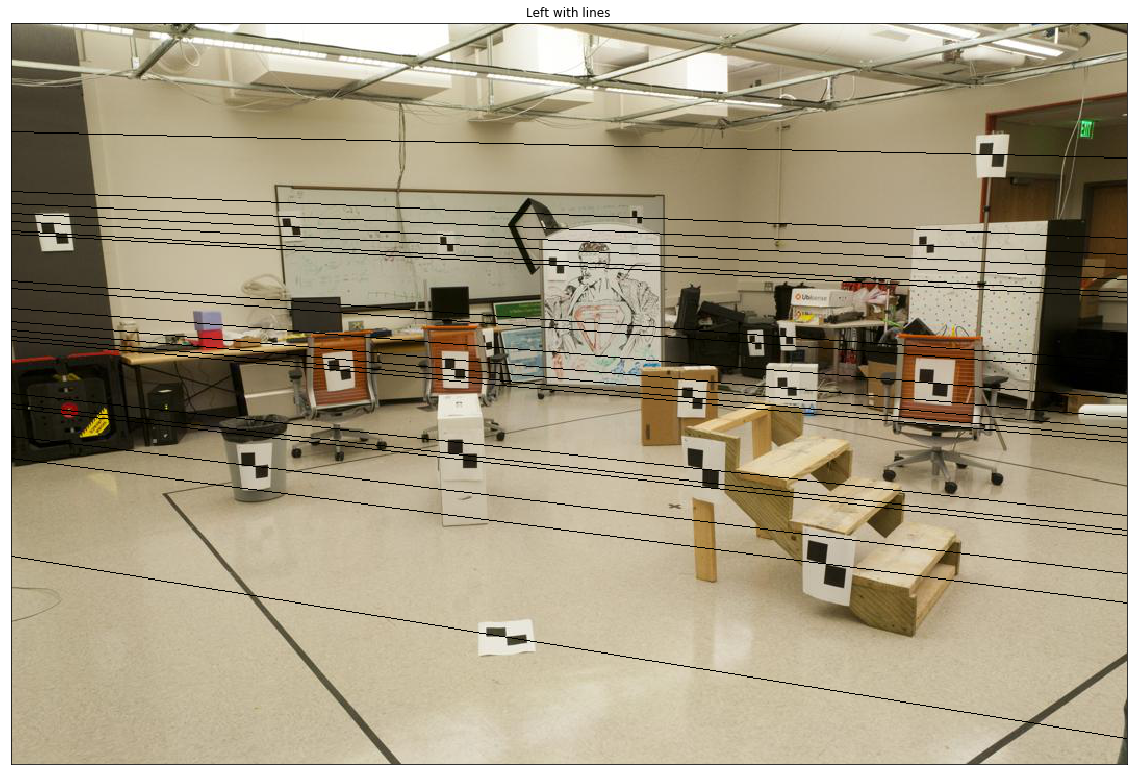

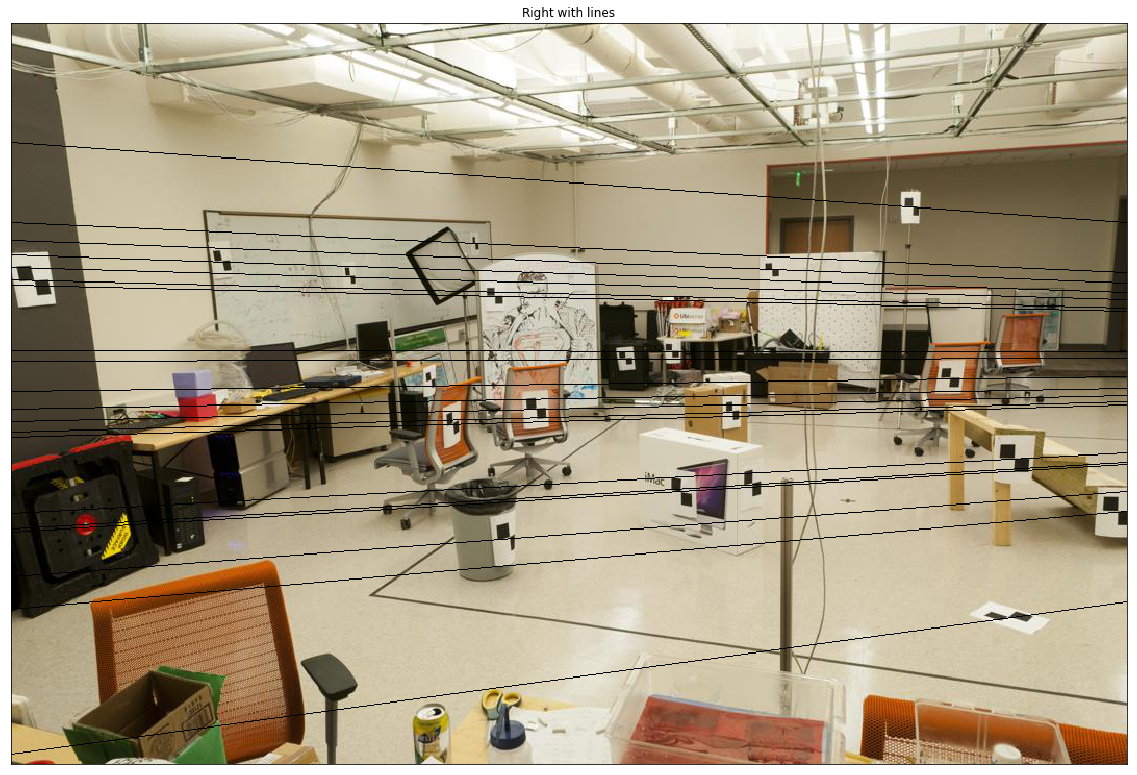

In [23]:
lineB=np.dot(UVsA,f)
lineA=np.dot(UVsB,f.T)
imgA = cv2.imread('pic_a.jpg')  
imgB = cv2.imread('pic_b.jpg') 

imgBLines = drawlines(imgB,lineB,UVsB,UVsA)
imgALines = drawlines(imgA,lineA,UVsA,UVsB)

b,g,r = cv2.split(imgALines)       # get b,g,r
imgALines = cv2.merge([r,g,b])     # switch it to rgb
plt.figure(figsize=(20,30))
plt.imshow(imgALines)
plt.title('Left with lines'), plt.xticks([]), plt.yticks([])
plt.show()

b,g,r = cv2.split(imgBLines)       # get b,g,r
imgBLines = cv2.merge([r,g,b])     # switch it to rgb
plt.figure(figsize=(20,30))
plt.imshow(imgBLines)
plt.title('Right with lines'), plt.xticks([]), plt.yticks([])
plt.show()